In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle as pkl
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df = pd.concat([df1, df2, df3, df4, df5])
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
188725,2024-09,YISHUN,4 ROOM,725,YISHUN ST 71,01 TO 03,84.0,Simplified,1987,460000.0,62 years 02 months
188726,2024-09,YISHUN,5 ROOM,432C,YISHUN AVE 1,01 TO 03,112.0,Improved,2015,610000.0,90 years 02 months
188727,2024-09,YISHUN,5 ROOM,305,YISHUN CTRL,10 TO 12,122.0,Improved,1988,660000.0,62 years 07 months
188728,2024-09,YISHUN,5 ROOM,149,YISHUN ST 11,07 TO 09,121.0,Improved,1985,630000.0,59 years 07 months


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934933 entries, 0 to 188729
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                934933 non-null  object 
 1   town                 934933 non-null  object 
 2   flat_type            934933 non-null  object 
 3   block                934933 non-null  object 
 4   street_name          934933 non-null  object 
 5   storey_range         934933 non-null  object 
 6   floor_area_sqm       934933 non-null  float64
 7   flat_model           934933 non-null  object 
 8   lease_commence_date  934933 non-null  int64  
 9   resale_price         934933 non-null  float64
 10  remaining_lease      225883 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 85.6+ MB


In [4]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [5]:
df.drop('remaining_lease',axis=1,inplace=True)

In [6]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [7]:
df[['year','month']]=df['month'].str.split('-',expand=True)

In [8]:
df[['storey_start','storey_end']]=df['storey_range'].str.split('TO',expand=True)

In [9]:
df['month']=pd.to_numeric(df['month'])
df['year']=pd.to_numeric(df['year'])
df['floor_area_sqm']=pd.to_numeric(df['floor_area_sqm'])
df['resale_price']=pd.to_numeric(df['resale_price'])
df['storey_start']=pd.to_numeric(df['storey_start'])
df['storey_end']=pd.to_numeric(df['storey_end'])

In [10]:
print(df.month.agg(['min', 'max']))
print(df.storey_start.agg(['min', 'max']))
print(df.storey_end.agg(['min', 'max']))
print(df.floor_area_sqm.agg(['min', 'max']))
print(df.lease_commence_date.agg(['min', 'max']))
print(df.year.agg(['min', 'max']))

min     1
max    12
Name: month, dtype: int64
min     1
max    49
Name: storey_start, dtype: int64
min     3
max    51
Name: storey_end, dtype: int64
min     28.0
max    366.7
Name: floor_area_sqm, dtype: float64
min    1966
max    2020
Name: lease_commence_date, dtype: int64
min    1990
max    2024
Name: year, dtype: int64


In [11]:
df.drop(columns='storey_range',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934933 entries, 0 to 188729
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                934933 non-null  int64  
 1   town                 934933 non-null  object 
 2   flat_type            934933 non-null  object 
 3   block                934933 non-null  object 
 4   street_name          934933 non-null  object 
 5   floor_area_sqm       934933 non-null  float64
 6   flat_model           934933 non-null  object 
 7   lease_commence_date  934933 non-null  int64  
 8   resale_price         934933 non-null  float64
 9   year                 934933 non-null  int64  
 10  storey_start         934933 non-null  int64  
 11  storey_end           934933 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 92.7+ MB


In [13]:
df['flat_model']=df['flat_model'].str.upper()
df['flat_type']=df['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

In [14]:
df.drop(['block','street_name'],axis=1,inplace=True)

In [15]:
df.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,storey_start,storey_end
0,1,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,9000.0,1990,10,12
1,1,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,6000.0,1990,4,6
2,1,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,8000.0,1990,10,12
3,1,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,6000.0,1990,7,9
4,1,ANG MO KIO,3 ROOM,73.0,NEW GENERATION,1976,47200.0,1990,4,6


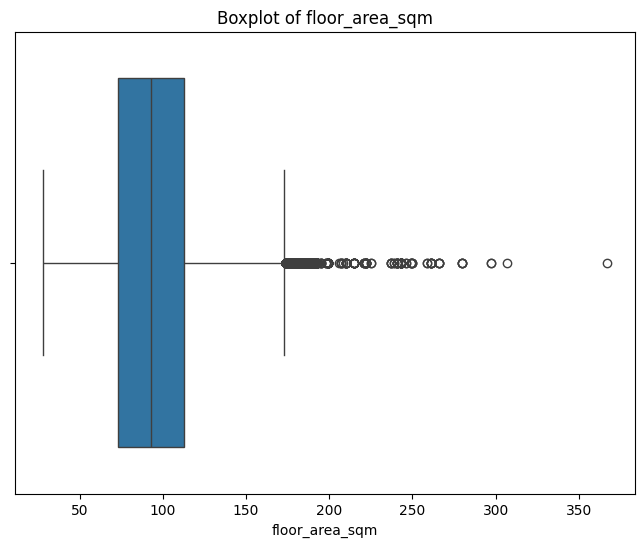

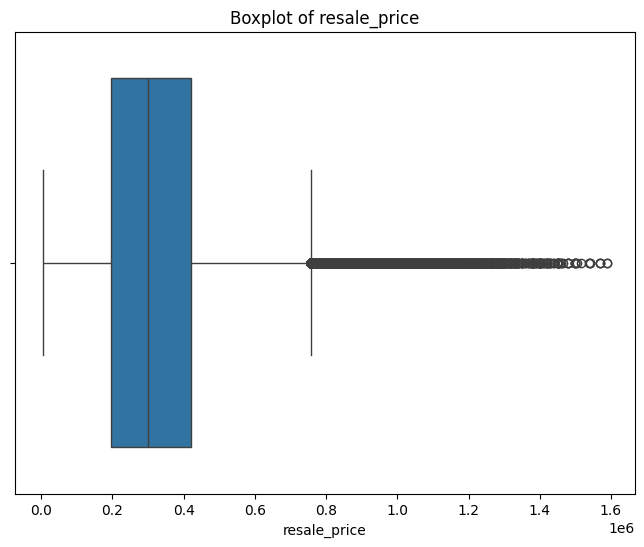

In [16]:
columns = ['floor_area_sqm',  'resale_price']

for col in columns:
    plt.figure(figsize=(8, 6))  
    sn.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [17]:
df['floor_area_sqm_log']=np.log(df['floor_area_sqm'])
df['resale_price_log']=np.log(df['resale_price'])

In [18]:
def outlier(df, column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)

    upper_threshold = df[column].quantile(0.75) + (1.5*IQR)
    lower_threshold = df[column].quantile(0.25) - (1.5*IQR)
    
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [19]:
outlier(df,'floor_area_sqm_log')
outlier(df,'resale_price_log')

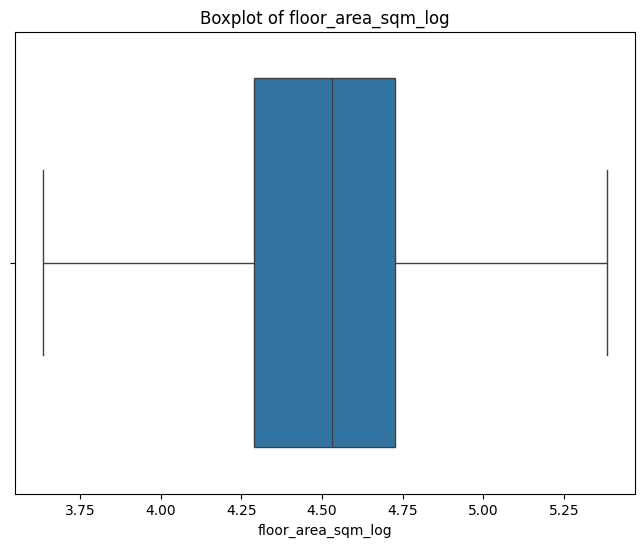

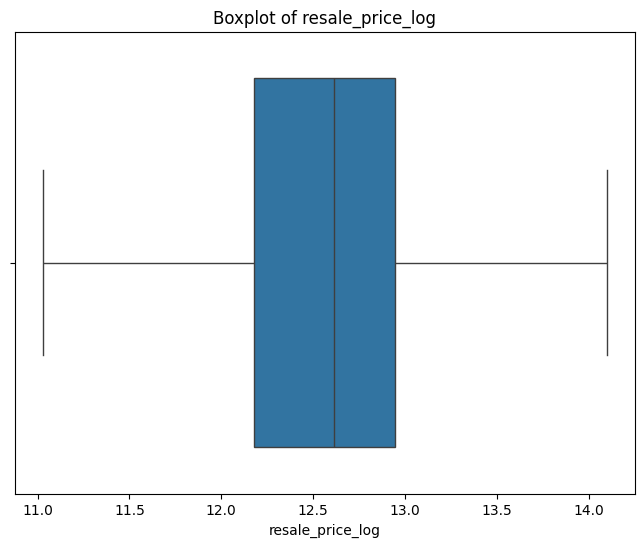

In [20]:
columns = ['floor_area_sqm_log',  'resale_price_log']

for col in columns:
    plt.figure(figsize=(8, 6))  
    sn.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [21]:
df.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'year', 'storey_start',
       'storey_end', 'floor_area_sqm_log', 'resale_price_log'],
      dtype='object')

In [22]:
df.drop(columns=['floor_area_sqm','resale_price'],inplace=True)

<Axes: >

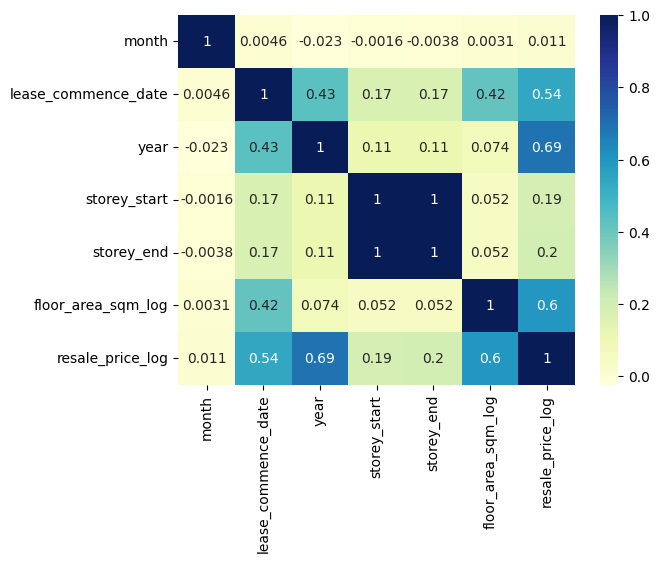

In [23]:
x=df[['month','lease_commence_date', 'year', 'storey_start', 'storey_end', 'floor_area_sqm_log', 'resale_price_log']].corr()
sn.heatmap(x, annot=True, cmap="YlGnBu")

In [24]:
df_new = df.copy()
df_new.head()

,month,town,flat_type,flat_model,lease_commence_date,year,storey_start,storey_end,floor_area_sqm_log,resale_price_log
0,1,ANG MO KIO,1 ROOM,IMPROVED,1977,1990,10,12,3.635067,11.029872
1,1,ANG MO KIO,1 ROOM,IMPROVED,1977,1990,4,6,3.635067,11.029872
2,1,ANG MO KIO,1 ROOM,IMPROVED,1977,1990,10,12,3.635067,11.029872
3,1,ANG MO KIO,1 ROOM,IMPROVED,1977,1990,7,9,3.635067,11.029872
4,1,ANG MO KIO,3 ROOM,NEW GENERATION,1976,1990,4,6,4.290459,11.029872


In [25]:
df_new["town"]= LabelEncoder().fit_transform(df_new[["town"]])
df_new["flat_type"]= LabelEncoder().fit_transform(df_new[["flat_type"]])
df_new["flat_model"]= LabelEncoder().fit_transform(df_new[["flat_model"]])

In [26]:
df_new['town'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
       22, 23, 24, 25, 26, 15, 20,  5, 17, 18])

In [27]:
df_new['flat_type'].unique()

array([0, 2, 3, 4, 1, 5, 6])

In [28]:
df_new["flat_model"].unique()

array([ 5, 12,  8, 17, 16,  9,  3,  7, 18,  0,  6, 11, 13,  2, 15, 10,  4,
       19, 20, 14,  1])

In [29]:
df_new.head()

,month,town,flat_type,flat_model,lease_commence_date,year,storey_start,storey_end,floor_area_sqm_log,resale_price_log
0,1,0,0,5,1977,1990,10,12,3.635067,11.029872
1,1,0,0,5,1977,1990,4,6,3.635067,11.029872
2,1,0,0,5,1977,1990,10,12,3.635067,11.029872
3,1,0,0,5,1977,1990,7,9,3.635067,11.029872
4,1,0,2,12,1976,1990,4,6,4.290459,11.029872


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934933 entries, 0 to 188729
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                934933 non-null  int64  
 1   town                 934933 non-null  int32  
 2   flat_type            934933 non-null  int32  
 3   flat_model           934933 non-null  int32  
 4   lease_commence_date  934933 non-null  int64  
 5   year                 934933 non-null  int64  
 6   storey_start         934933 non-null  int64  
 7   storey_end           934933 non-null  int64  
 8   floor_area_sqm_log   934933 non-null  float64
 9   resale_price_log     934933 non-null  float64
dtypes: float64(2), int32(3), int64(5)
memory usage: 67.8 MB


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [32]:
x = df_new.drop(['resale_price_log'], axis = 1)
y = df_new['resale_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
model = LinearRegression()

model.fit(x_train, y_train)
#train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"MSE Test: {mean_squared_error(y_test,test_pred)}")
print(f"MAE Test: {mean_absolute_error(y_test,test_pred)}")
#print(f"RMSE Test: {root_mean_squared_error(y_test,test_pred)}")
print(f"R2 Test: {r2_score(y_test,test_pred)}")

MSE Test: 0.06943167030552332
MAE Test: 0.20659150815067762
R2 Test: 0.7927265060405798


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
model_d = DecisionTreeRegressor()
model_d.fit(x_train, y_train)
#train_pred = model.predict(x_train)
test_pred = model_d.predict(x_test)

print(f"MSE Test: {mean_squared_error(y_test,test_pred)}")
print(f"MAE Test: {mean_absolute_error(y_test,test_pred)}")
#print(f"RMSE Test: {root_mean_squared_error(y_test,test_pred)}")
print(f"R2 Test: {r2_score(y_test,test_pred)}")

MSE Test: 0.010362329418973672
MAE Test: 0.06976778151038392
R2 Test: 0.9690654680381742


In [34]:
df_new.iloc[123]

month                     1.000000
town                      0.000000
flat_type                 3.000000
flat_model               12.000000
lease_commence_date    1984.000000
year                   1990.000000
storey_start              1.000000
storey_end                3.000000
floor_area_sqm_log        4.510860
resale_price_log         11.029872
Name: 123, dtype: float64

In [35]:
# store the model using pickle
import pickle as pkl

with open('DT.pkl','wb') as file:
    pkl.dump(model_d,file)

In [36]:
with open('DT.pkl','rb') as file:
    model_DT=pkl.load(file)

In [37]:
new_sample = np.array([[1, 0, 3, 12,1984, 1990, 1, 3, 4.510860]])
new_pred = model_DT.predict(new_sample)
print("Predicted Resale Price:", np.exp(new_pred))

Predicted Resale Price: [61689.69070388]


In [38]:
df_new.to_csv("ResalePrice (1990 - 2017 onwards).csv", index= False)